# EDA Report: Indian Kids' Screen Time
**Author:** Piyush Singh Bhadoriya

**Goal:** To analyze screen time behavior among Indian kids and its effects on health and education.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Observing The Data

In [67]:
data = pd.read_csv("Indian_Kids_Screen_Time.csv")
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [69]:
data.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [70]:
print(data.shape)

(9712, 8)


# Data Cleaning

In [71]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

**The 'Health_Impact' column is crucial for our analysis of this dataset. Due to the significant number of missing values in this column, we will drop all rows where 'Health_Impact' is missing.**

In [72]:
data.dropna(inplace=True)

In [73]:
data.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [74]:
data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


# Data Analysis

In [75]:
data['Gender'].value_counts()

Gender
Male      3342
Female    3152
Name: count, dtype: int64

**Average Screen Time By Gender**

In [76]:
avg_screen_time_gender = data.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
avg_screen_time_gender

Gender
Female    4.930216
Male      4.905583
Name: Avg_Daily_Screen_Time_hr, dtype: float64

*The average screen time does not show significant variation across genders, indicating that boys and girls in the dataset tend to spend similar amounts of time on screens.*

**Which Device has the most screen time?**

In [77]:
device_screen_time = data.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean()
device_screen_time

Primary_Device
Laptop        4.710437
Smartphone    4.898008
TV            5.029829
Tablet        5.050211
Name: Avg_Daily_Screen_Time_hr, dtype: float64

**Does the area in which kids live affect their screen time?**

In [78]:
Area_effect = data.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean()
Area_effect

Urban_or_Rural
Rural    4.938183
Urban    4.909008
Name: Avg_Daily_Screen_Time_hr, dtype: float64

*The average screen time remains largely consistent between children living in rural and urban areas, suggesting that geographical location does not significantly influence screen usage in this dataset.*

**Is Screen Time Very High For Certain Age Group**

In [79]:
Age_screen_time = data.groupby('Age')['Avg_Daily_Screen_Time_hr'].max()
Age_screen_time

Age
8     11.97
9     12.80
10    13.89
11     8.55
12     8.29
13     8.24
14     7.68
15     8.04
16     8.67
17     8.26
18     8.01
Name: Avg_Daily_Screen_Time_hr, dtype: float64

*Children aged between 8 and 10 exhibit the highest average screen time in the dataset, indicating a peak in screen usage during this age range.*

**Are Girls And Boys Using Different Devices**

'''pandas.crosstab() creates a summary table (or matrix) showing the frequency distribution (counts) of two or more categorical variables.

It’s super useful when you want to compare two categories — like Gender vs Device Used.'''

In [98]:
device_by_gender = pd.crosstab(data['Gender'], data['Primary_Device'])
device_by_gender

Primary_Device,Laptop,Smartphone,TV,Tablet
Gender,,,,
Female,542,1475,767,368
Male,511,1623,816,392


Is low education/recreation ratio linked to more health impacts?

In [81]:
def categorize_ratio(ratio):
    if ratio < 0.5:
        return 'Low'
    elif ratio >= 0.5 and ratio < 1.5:
        return 'Medium'
    else:
        return 'High'
data['Ratio_Category'] = data['Educational_to_Recreational_Ratio'].apply(categorize_ratio)

In [82]:
health_impact_summary = data.groupby(['Ratio_Category', 'Health_Impacts']).size().unstack(fill_value=0)
health_impact_summary

Health_Impacts,Anxiety,"Anxiety, Obesity Risk",Eye Strain,"Eye Strain, Anxiety","Eye Strain, Anxiety, Obesity Risk","Eye Strain, Obesity Risk",Obesity Risk,Poor Sleep,"Poor Sleep, Anxiety","Poor Sleep, Anxiety, Obesity Risk","Poor Sleep, Eye Strain","Poor Sleep, Eye Strain, Anxiety","Poor Sleep, Eye Strain, Anxiety, Obesity Risk","Poor Sleep, Eye Strain, Obesity Risk","Poor Sleep, Obesity Risk"
Ratio_Category,,,,,,,,,,,,,,,
Low,333,62,568,116,29,93,224,1962,531,70,858,223,35,164,392
Medium,52,7,76,19,6,13,28,306,77,8,121,35,2,24,60


# Visualization

**Average Screen Time By Gender**

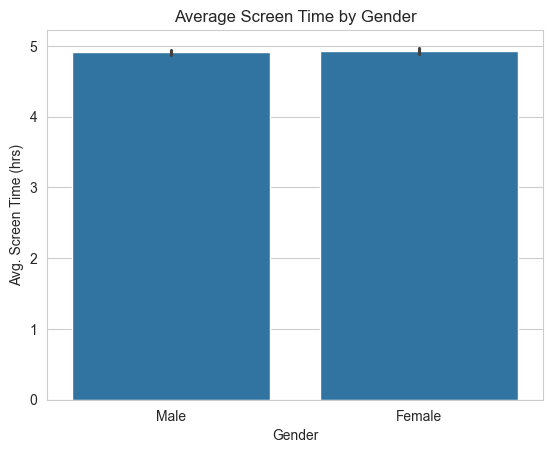

In [83]:
sns.barplot(data = data, x = 'Gender', y = 'Avg_Daily_Screen_Time_hr', estimator='mean')
plt.title('Average Screen Time by Gender')
plt.ylabel('Avg. Screen Time (hrs)')
plt.show()

*This was confirmed through a barplot comparison of screen time by gender, which showed similar central tendencies and distributions.*

**Average Screen Time Every Device**

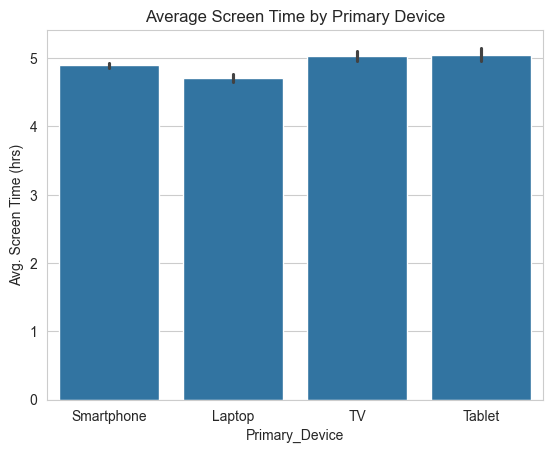

In [84]:
sns.barplot(data = data, x = 'Primary_Device', y = 'Avg_Daily_Screen_Time_hr', estimator='mean')
plt.title('Average Screen Time by Primary Device')
plt.ylabel('Avg. Screen Time (hrs)')
plt.show()

*This pattern was evident from the bar plot comparing average screen time by device type, which showed a relatively uniform distribution with marginally higher values for TV and tablet usage.*

**Count of Health Impacts per E:R Ratio Category**

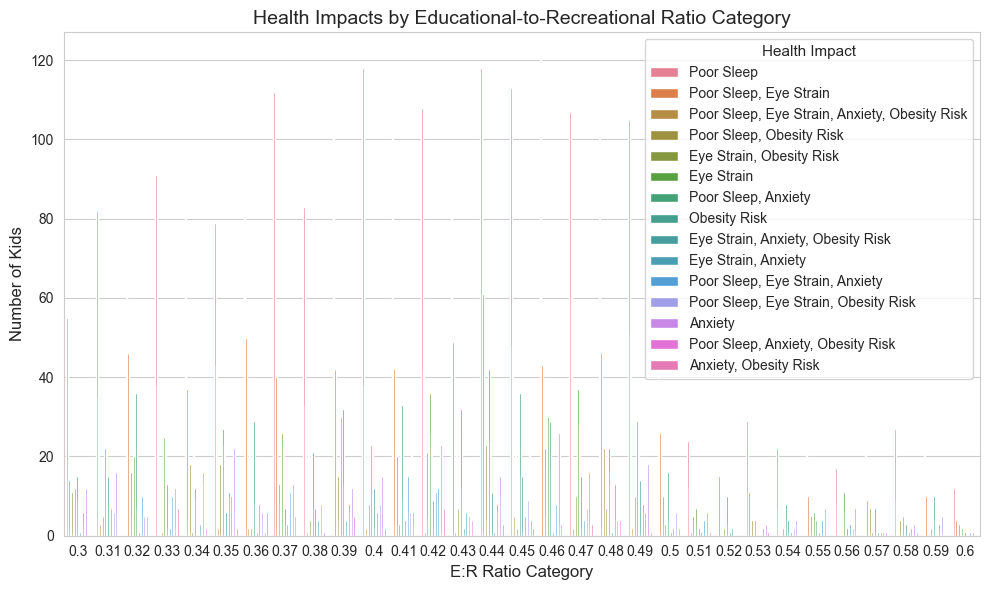

In [85]:
plt.figure(figsize=(10, 6))  # Bigger size for clarity
sns.set_style("whitegrid")   # Clean background
sns.countplot(data=data, x='Educational_to_Recreational_Ratio', hue='Health_Impacts')
plt.title('Health Impacts by Educational-to-Recreational Ratio Category', fontsize=14)
plt.xlabel('E:R Ratio Category', fontsize=12)
plt.ylabel('Number of Kids', fontsize=12)
plt.legend(title='Health Impact', title_fontsize=11, fontsize=10)
plt.xticks(rotation=0)  # Keep labels horizontal
plt.tight_layout()
plt.show()


*This chart shows that kids who spend more time watching fun stuff like cartoons or games (instead of learning things) tend to have more health problems, like not sleeping well, tired eyes, or feeling anxious. If kids spend a bit more time on learning and less on just fun screen time, it might help them stay healthier.*

**Screen Time by Health Impacts**


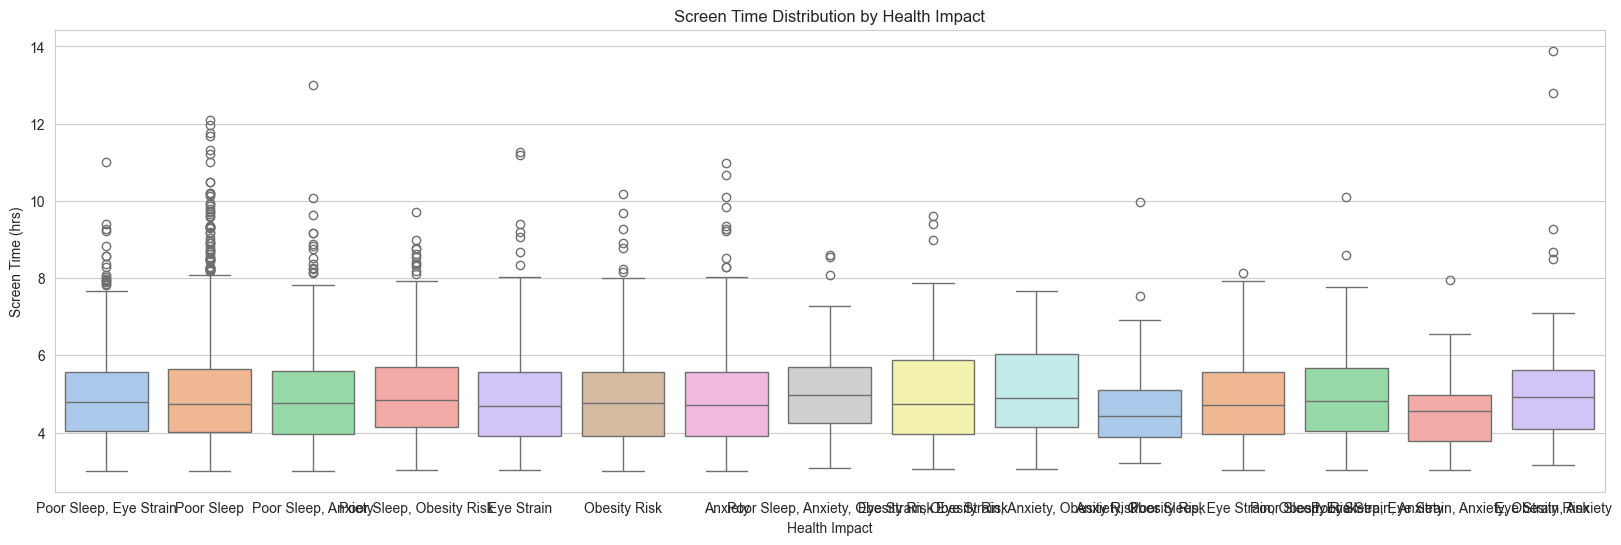

In [86]:
plt.figure(figsize=(20, 6))  # Bigger size for clarity
sns.set_style("whitegrid")
sns.boxplot(data=data, x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', hue='Health_Impacts', palette='pastel', legend=False)
plt.title('Screen Time Distribution by Health Impact')
plt.xlabel('Health Impact')
plt.ylabel('Screen Time (hrs)')
plt.show()

**Screen Time By Ratio Category**

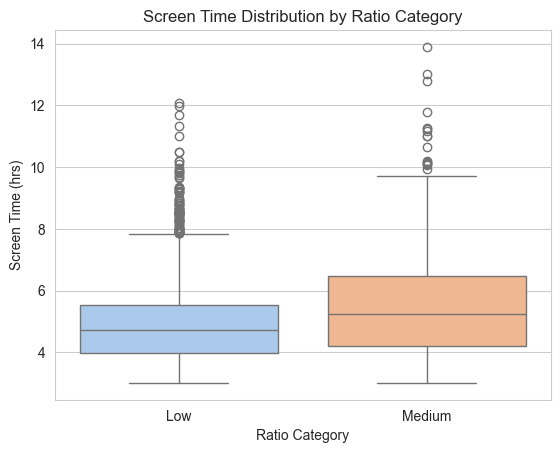

In [87]:
sns.boxplot(data=data, x='Ratio_Category', y='Avg_Daily_Screen_Time_hr', hue='Ratio_Category', palette='pastel', legend=False)
plt.title('Screen Time Distribution by Ratio Category')
plt.xlabel('Ratio Category')
plt.ylabel('Screen Time (hrs)')
plt.show()

Screen Time Distribution by Gender

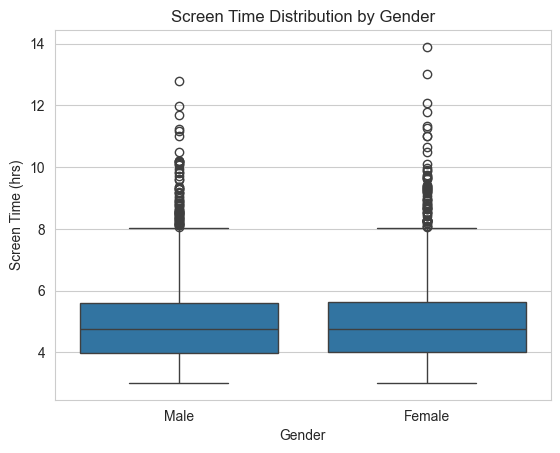

In [88]:
sns.boxplot(data=data, x='Gender', y='Avg_Daily_Screen_Time_hr')
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Screen Time (hrs)')
plt.show()

*Boys and girls both spend almost the same time using phones, tablets, or watching TV. Most of them use screens for about 4 to 6 hours a day — that’s like watching cartoons or playing games after school. But guess what? Some kids use screens way more, even more than 10 hours a day! That’s a lot! It’s important to take breaks and not spend too much time on screens, so our eyes and bodies stay healthy.*

Age VS Screen Time

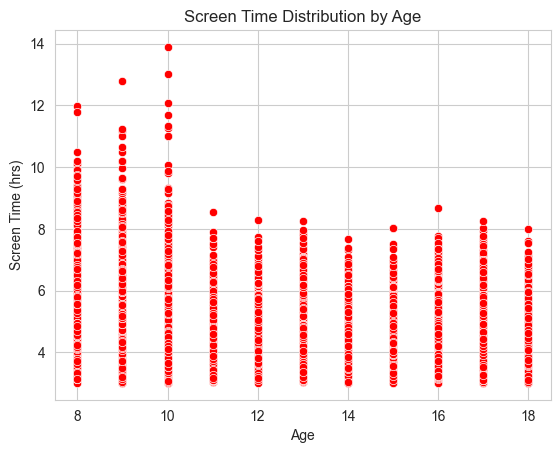

In [92]:
sns.scatterplot(data=data, x='Age', y='Avg_Daily_Screen_Time_hr', color='red')
plt.title('Screen Time Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Screen Time (hrs)')
plt.show()

*I was really surprised to see this! Some kids aged 8 to 10 are spending 10 to 13 hours a day on screens. That’s a lot! Younger kids are using screens way more than older ones. It’s a good reminder to take breaks and do other fun things too!*

**Educational to Recreational Ratio vs Screen Time (Scatter)**


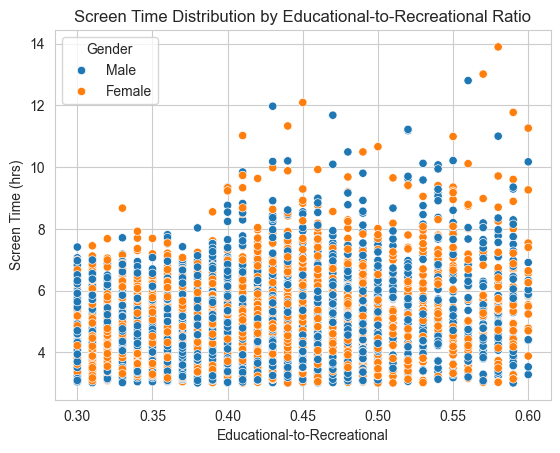

In [97]:
sns.scatterplot(data=data, x='Educational_to_Recreational_Ratio', y= 'Avg_Daily_Screen_Time_hr', hue='Gender')
plt.title('Screen Time Distribution by Educational-to-Recreational Ratio')
plt.xlabel('Educational-to-Recreational')
plt.ylabel('Screen Time (hrs)')
plt.show()